In [108]:
import math as math
import numpy as np
import scipy as scipy
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import sys
import os

from qutip import *
from src_2_0 import *

In [109]:
### General parameters ###

g_0 = 0.01 # Light-matter coupling
C = np.linspace(1e-15,2,30) # Cooperativity (equal to the pumping parameter p)
delta_c = 1 # Detuning w_c-w_p
n_q = 100 # Photon saturation number

### Squeezed parameters ###

theta = np.pi # Squeezing angle

In [110]:
b = open('GAP50_0.75.txt','r')

data_50 = b.readlines()

n_50 = np.zeros(np.size(C),dtype=complex)


for i in range(C.size):
    data_50[i] = data_50[i].split()
    n_50[i]=data_50[i][1]

b.close()

In [111]:
c = open('GAP100_0.75.txt','r')

data_100 = c.readlines()

n_100 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_100[i] = data_100[i].split()
    n_100[i]=data_100[i][1]

c.close()

In [112]:
d = open('GAP200_0.75.txt','r')

data_200 = d.readlines()

n_200 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_200[i] = data_200[i].split()
    n_200[i]=data_200[i][1]

d.close()

In [113]:
r = 0.75
C_s = C*np.cosh(r)**2 # Squeezed cooperativity (equal to the squeezed pumping parameter p_s)

c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


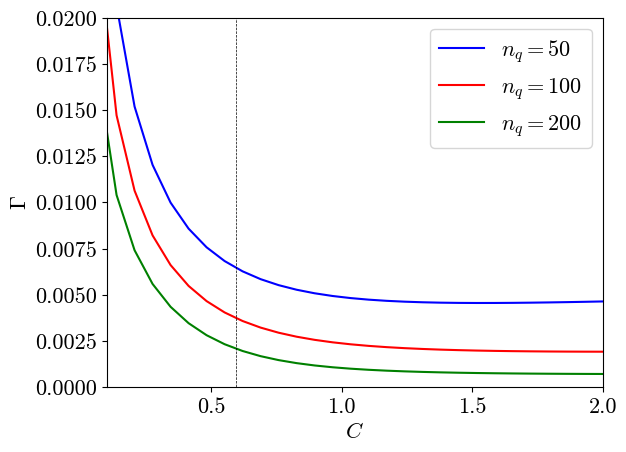

In [114]:
fig1,ax1 = plt.subplots()
ax1.plot(C,2*n_50,'b',label='$n_q=50$')
ax1.plot(C,2*n_100,'r',label='$n_q=100$')
ax1.plot(C,2*n_200,'g',label='$n_q=200$')
ax1.plot([np.cosh(r)**-2,np.cosh(r)**-2+1e-25],[-1,1],'--',lw=0.5,color='k')
plt.xlim([0.1,max(C)])
plt.ylim([0,0.02])
plt.xlabel('$C$')
plt.ylabel(r'$\Gamma$')
plt.legend()
plt.show()
fig1.savefig('Gap.png',dpi=500, bbox_inches = 'tight')

In [115]:
np.cosh(r)**-2

0.5965858082813313

In [79]:
e = open('g2_2.0_b_0.75.txt','r')

data_g2 = e.readlines()

g2 = np.zeros(10000)
tau_vec = np.zeros(10000)

for i in range(10000):
    data_g2[i] = data_g2[i].split()
    g2[i]=data_g2[i][1]
    tau_vec[i]=data_g2[i][0]

e.close()

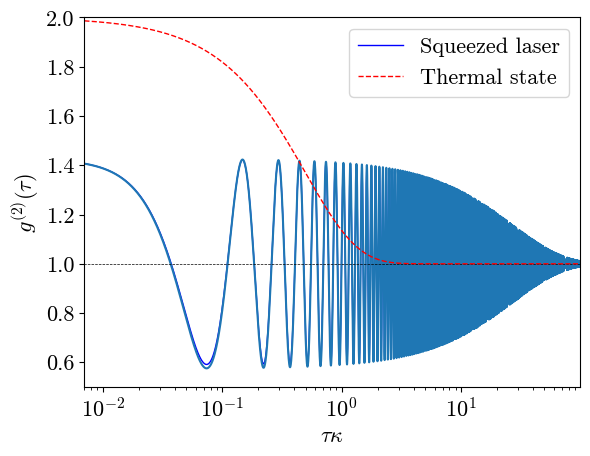

In [230]:
fig2,ax2 = plt.subplots()
ax2.plot(tau_vec,g2,lw=1,color='b',label='Squeezed laser')
ax2.plot(tau_vec,(1+0.4254383848450862*(np.cos(0.021254801747114027*2*tau_vec/k[-1]))*np.exp(-0.0367*tau_vec))
ax2.plot([0,max(tau_vec)],[1,1],'--',lw=0.5,color='k')
ax2.plot(tau_vec,np.ones(np.size(tau_vec))+np.exp(-2*tau_vec),'--',lw=1,color='r',label='Thermal state')
plt.ylim([0.5,2])
plt.xlim([0.007,max(tau_vec)])
plt.xlabel(r'$\tau\kappa$')
plt.ylabel(r'$g^{(2)}(\tau)$')
plt.semilogx()
plt.legend()
# plt.title('Second order coherence function',fontsize=14)
plt.show()
#fig2.savefig('g2.png',dpi=500, bbox_inches = 'tight')

In [86]:
f = open('SPEC0.75_100.txt','r')

data_spec = f.readlines()

spec = np.zeros([2000,np.size(C)-8])
wlist = np.zeros(2000)

for i in range(2000):
    data_spec[i] = data_spec[i].split()
    spec[i]=data_spec[i][1:]
    wlist[i]=data_spec[i][0]

f.close()

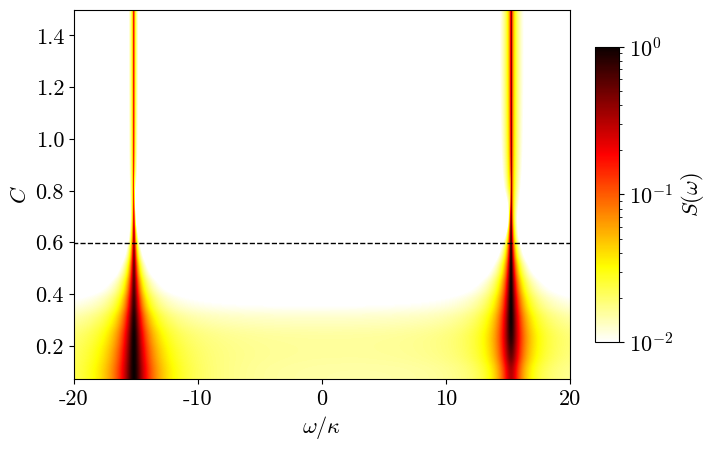

In [102]:
nrm = mpl.colors.Normalize(-2,0) # Colorbar settings

fig3, ax3 = plt.subplots()

cbar = plt.colorbar(cm.ScalarMappable(norm=mpl.colors.LogNorm(0.01,1), cmap=cm.hot_r), label=r'$S(\omega)$', cax = ax3.inset_axes([1.05, 0.1, 0.05, 0.8]))
ax3.imshow(np.log10(np.transpose(np.abs(spec))), extent = [-62.80043715,62.73763671,6.89655172e-02,1.51724138e+00], origin='lower', cmap=cm.hot_r, norm=nrm, aspect='auto', interpolation='Gaussian')
ax3.plot([-30,30],[np.cosh(r)**-2,np.cosh(r)**-2],'--',lw=1,color='k')
ax3.set_ylabel(r'$C$')
ax3.set_xlabel(r'$\omega/\kappa$')
ax3.set_xlim([-20,20])
ax3.set_ylim([0.07,1.5])

fig3.savefig('spec.png',dpi=500, bbox_inches = 'tight')

In [116]:
k = g_0*np.sqrt(2/(C*n_q)) # Photon decay rate

In [117]:
k[-1]

0.001

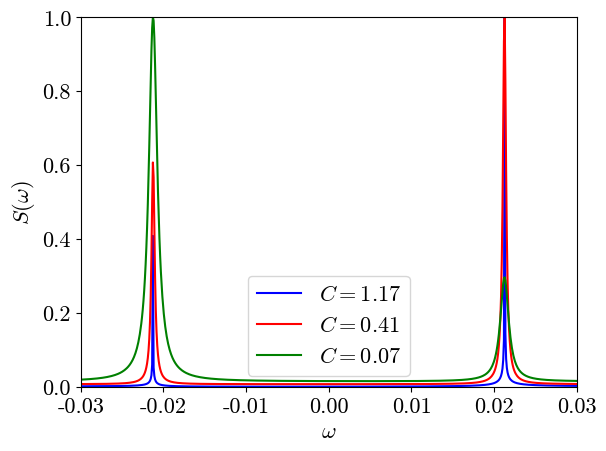

In [107]:
fig4, ax4 = plt.subplots()
ax4.plot(wlist*0.0014,np.abs(spec[:,16])/np.max(np.real(spec[:,16])),'b',label='$C=$'+str(format(C[17],'.2f')))
ax4.plot(wlist*0.0014,np.real(spec[:,5])/np.max(np.real(spec[:,5])),'r',label='$C=$'+str(format(C[6],'.2f')))
ax4.plot(wlist*0.0014,np.real(spec[:,0])/np.max(np.real(spec[:,0])),'g',label='$C=$'+str(format(C[1],'.2f')))
# plt.title('freq. spectrum',fontsize=14)
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.xlim([-0.03,0.03])
plt.ylim([0,1.0])
plt.legend()
fig4.savefig('spec_2.png',dpi=500, bbox_inches = 'tight')